# <font style="color:darkblue;font-size:48px">**# Kaggle Datasets for Stock Price Prediction using Machine Learning Technique**</font>

<br/>
<font style="color:green;font-size:20px">For my data analysis, I have used LSTM(Long Short Term Memory Network) technique which is a recurrent neural network, a type of deep learning neural network for data sequences like stock prices movement for prediction.</font>
<br/>
<br/>
<font style="color:green;font-size:20px">The tools that I used in this project are Jupyter Notebook, Numpy, Pandas, Matplotlib, Seaborn, Scikit-learn, keras and tensorflow </font>

<br/>
<font style="color:#8B8000;font-size:20px"><b>----------------------------------------</b></font>
<br/>
<font style="color:#8B8000;font-size:14px"><b>The synthetic data is obtained from Kaggle datasets and contributed by Oleh Onyshchak. It is available for use and licensed under CC0: Public Domain.</b></font>
<br/>
<font style="color:#8B8000;font-size:20px"><b>----------------------------------------</b></font>
<br/>
<font style="color:#8B8000;font-size:14px"><b>This is an open-source project. Please just give a proper citation in your use.</b></font>
<br/>
<br/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error

print(pd)
print(sns)

<module 'pandas' from '/Users/ericthan/PycharmProjects/pythonProject/test1/lib/python3.8/site-packages/pandas/__init__.py'>
<module 'seaborn' from '/Users/ericthan/PycharmProjects/pythonProject/test1/lib/python3.8/site-packages/seaborn/__init__.py'>


<br/>
<font style="color:#8B8000;font-size:20px"><b>----------------------------------------</b></font>
<br/>
<font style="color:green;font-size:20px">Exploratory Data Analysis & Visualisation</font>
<br/>
<font style="color:#8B8000;font-size:20px"><b>----------------------------------------</b></font>
<br/>
<br/>

In [2]:

df = pd.read_csv('/Users/ericthan/Desktop//DataAnalysis_Numpy/Showcase_Jupyter/archive/symbols_valid_meta.csv', low_memory=False)
df.head()

#ETF and stocks are available as per table below

,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
0,Y,A,"Agilent Technologies, Inc. Common Stock",N,,N,100.0,N,NaN,A,A,N
1,Y,AA,Alcoa Corporation Common Stock,N,,N,100.0,N,NaN,AA,AA,N
2,Y,AAAU,Perth Mint Physical Gold ETF,P,,Y,100.0,N,NaN,AAAU,AAAU,N
3,Y,AACG,ATA Creativity Global - American Depositary Sh...,Q,G,N,100.0,N,N,NaN,AACG,N
4,Y,AADR,AdvisorShares Dorsey Wright ADR ETF,P,,Y,100.0,N,NaN,AADR,AADR,N


[Text(0.5, 23.52222222222222, 'data attributes'),
 Text(50.722222222222214, 0.5, 'row')]

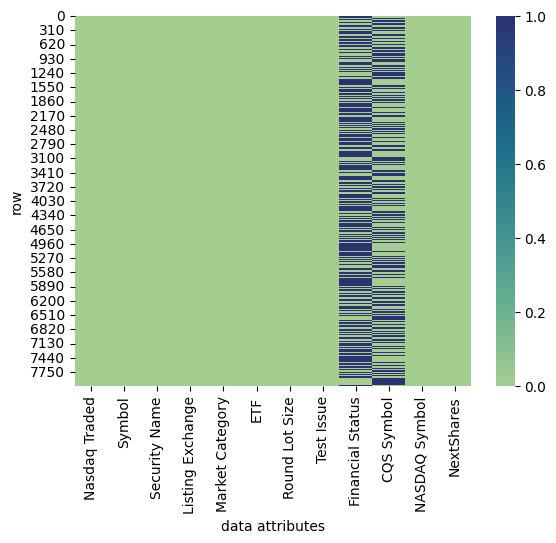

In [3]:

ax = sns.heatmap(df.isnull(), cmap="crest")
ax.set(xlabel="data attributes", ylabel="row")

# As per heat map below, only Financial Status and CQS Symbol have NaN(unknown) data. 

In [4]:
df.isnull().sum()

Nasdaq Traded          0
Symbol                 0
Security Name          0
Listing Exchange       0
Market Category        0
ETF                    0
Round Lot Size         0
Test Issue             0
Financial Status    4666
CQS Symbol          3383
NASDAQ Symbol          0
NextShares             0
dtype: int64

In [5]:

# Pick one stock datasheet
f = '/Users/ericthan/Desktop//DataAnalysis_Numpy/Showcase_Jupyter/archive/stocks/AAPL.csv'
df_s = pd.read_csv( f , low_memory=False)
name , extension = path.splitext(f)
stock_name = name.split("/")[-1]
print('File Name:', stock_name)
display(df_s)


File Name: AAPL


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400
...,...,...,...,...,...,...,...
9904,2020-03-26,246.520004,258.679993,246.360001,258.440002,258.440002,63021800
9905,2020-03-27,252.750000,255.869995,247.050003,247.740005,247.740005,51054200
9906,2020-03-30,250.740005,255.520004,249.399994,254.809998,254.809998,41994100
9907,2020-03-31,255.600006,262.489990,252.000000,254.289993,254.289993,49250500


In [6]:
df_s.isnull().sum()

# No null data is in the data

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df_s.describe()

# min stock price is ~0.15 and max is ~327.2

,Open,High,Low,Close,Adj Close,Volume
count,9909.000000,9909.000000,9909.000000,9909.000000,9909.000000,9.909000e+03
mean,32.606849,32.936079,32.277560,32.618030,30.576570,8.582916e+07
std,58.415759,59.001576,57.883037,58.471899,56.746275,8.597195e+07
min,0.198661,0.198661,0.196429,0.196429,0.155638,3.472000e+05
25%,1.071429,1.089286,1.048571,1.071429,0.917643,3.304230e+07
50%,1.729286,1.758929,1.696429,1.732143,1.466154,5.766490e+07
75%,35.799999,36.265713,35.328571,35.761429,31.042374,1.069992e+08
max,324.739990,327.850006,323.350006,327.200012,327.200012,1.855410e+09


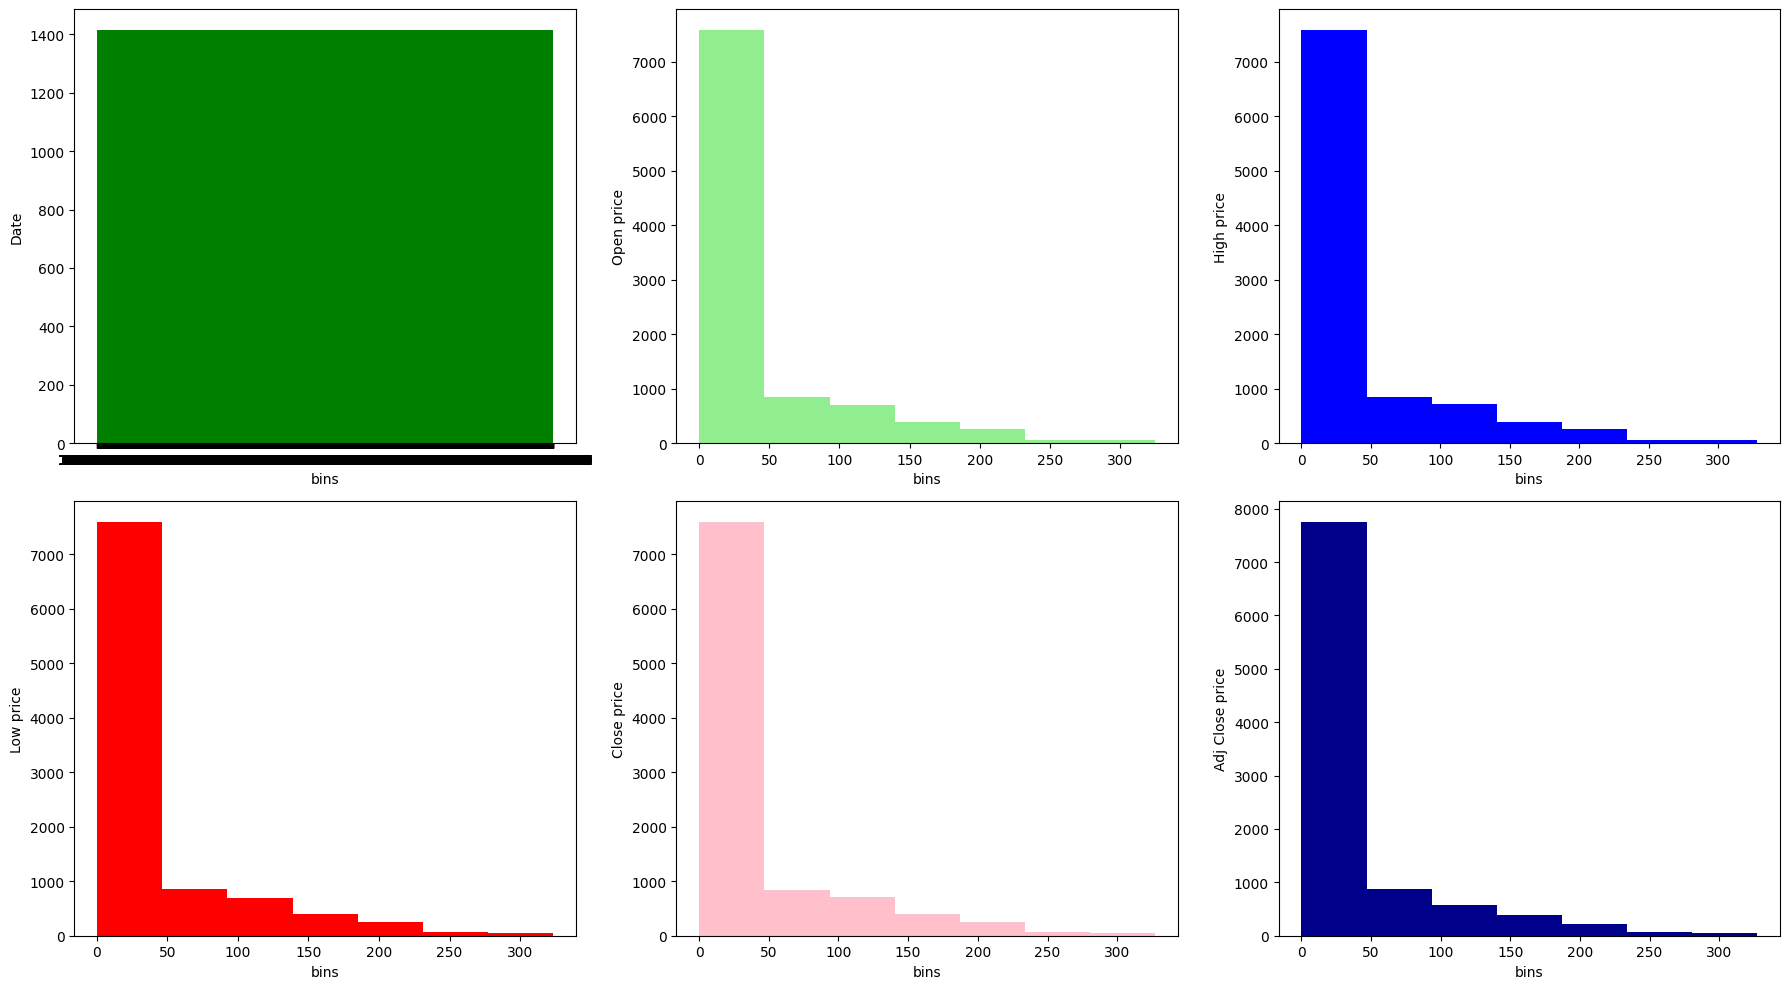

In [8]:

fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(nrows=2, ncols=3, figsize=(18,10))

ax0.hist(df_s['Date'], bins=7, color='green')
ax0.set_xlabel("bins")
ax0.set_ylabel("Date")

ax1.hist(df_s['Open'], bins=7, color='lightgreen')
ax1.set_xlabel("bins")
ax1.set_ylabel("Open price")

ax2.hist(df_s['High'], bins=7, color='blue')
ax2.set_xlabel("bins")
ax2.set_ylabel("High price")

ax3.hist(df_s['Low'], bins=7, color='red')
ax3.set_xlabel("bins")
ax3.set_ylabel("Low price")

ax4.hist(df_s['Close'], bins=7, color='pink')
ax4.set_xlabel("bins")
ax4.set_ylabel("Close price")

ax5.hist(df_s['Adj Close'], bins=7, color='darkblue')
ax5.set_xlabel("bins")
ax5.set_ylabel("Adj Close price")

fig.tight_layout()
plt.show()


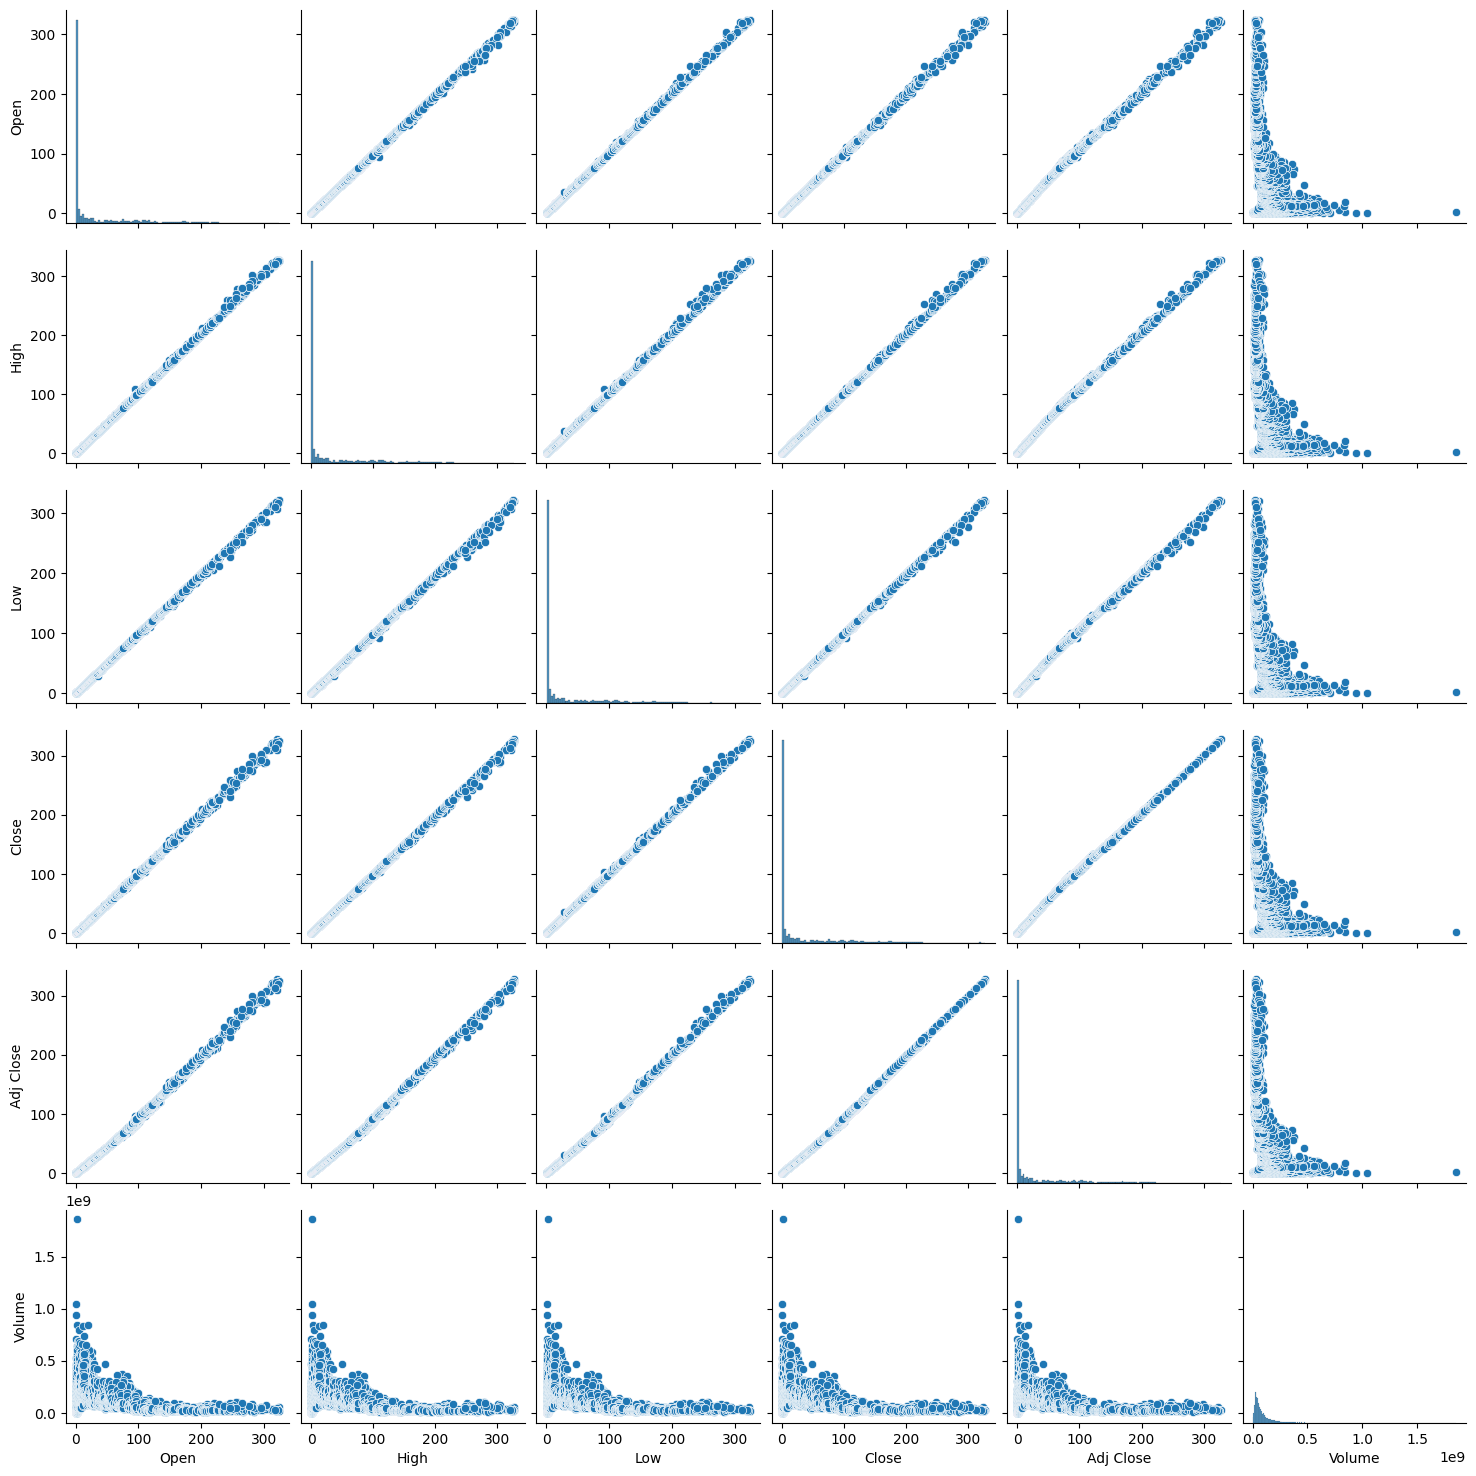

In [9]:
sns.pairplot(df_s)

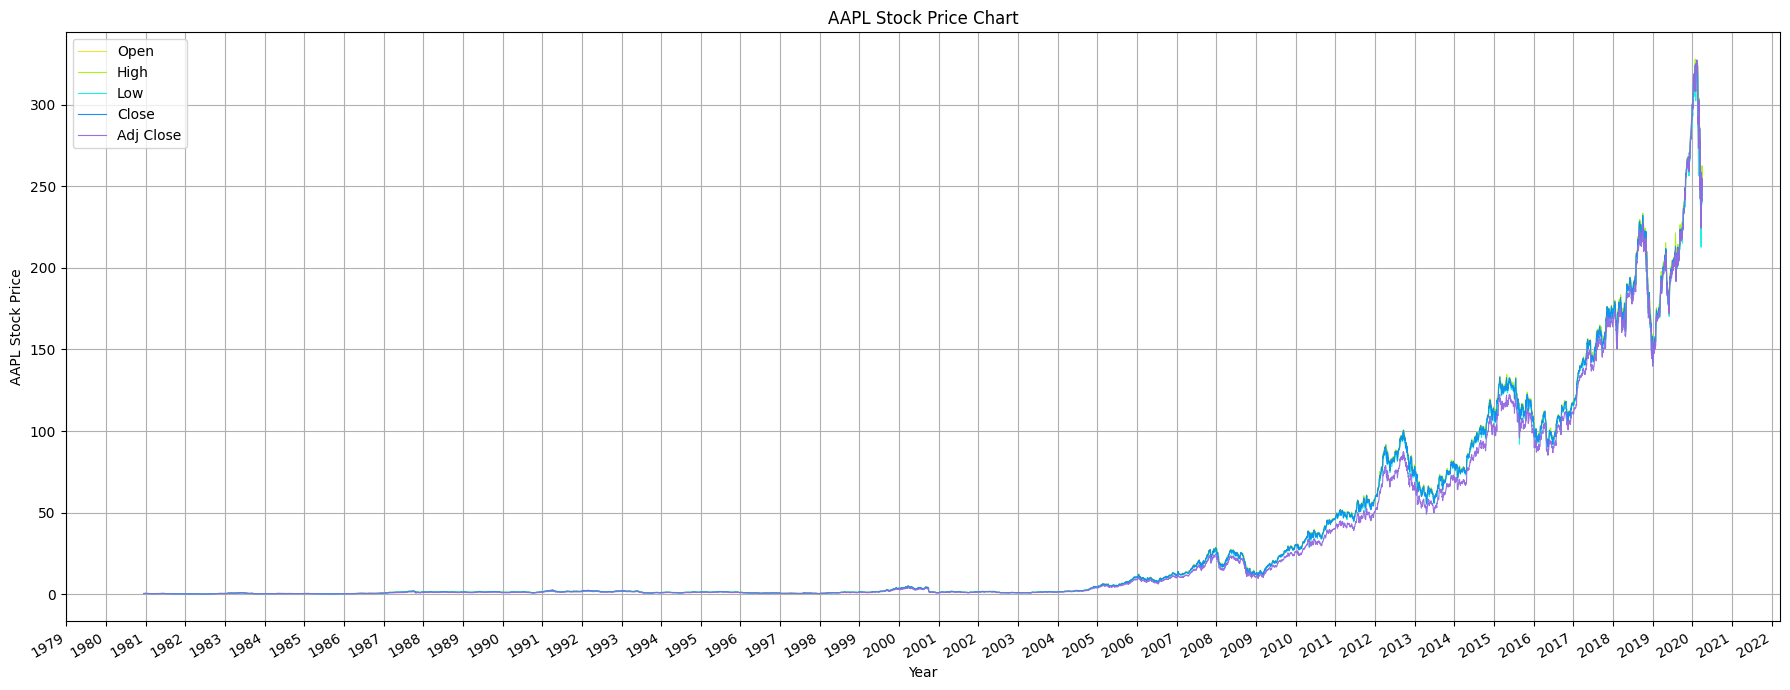

In [10]:

from matplotlib.dates import DateFormatter
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.dates import YearLocator
import matplotlib.dates as mdates

df_s['Date'] =pd.to_datetime(df_s['Date'],format='%Y-%m-%d')

fig, ax = plt.subplots(1, figsize=(18,7))
ax.plot(df_s['Date'], df_s['Open'], linewidth=0.8, label='Open', alpha=0.96, color='#E7E230')
ax.plot(df_s['Date'], df_s['High'], linewidth=0.8, label='High', alpha=0.96, color='#A5F411')
ax.plot(df_s['Date'], df_s['Low'], linewidth=0.8, label='Low', alpha=0.96, color='#11F4E3')
ax.plot(df_s['Date'], df_s['Close'], linewidth=0.8, label='Close', alpha=0.96, color='#118DF3')
ax.plot(df_s['Date'], df_s['Adj Close'], linewidth=0.8, label='Adj Close', alpha=0.96, color='#946AE1')


# format the ticks
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))


#ax.set_yscale('log')
ax.set_title('{} Stock Price Chart'.format(stock_name))
ax.legend(loc='upper left')
ax.set_xlabel('Year')
ax.set_ylabel('{} Stock Price'.format(stock_name))


#plt.xticks(rotation=90)
fig.autofmt_xdate()
ax.grid(True)
plt.tight_layout()
plt.show()



<br/>
<font style="color:#8B8000;font-size:20px"><b>----------------------------------------</b></font>
<br/>
<font style="color:green;font-size:20px">Data Preparation and Transformation</font>
<br/>
<font style="color:#8B8000;font-size:20px"><b>----------------------------------------</b></font>
<br/>
<br/>
<br/>

In [11]:
#df_s.set_index(pd.DatetimeIndex(df_s['Date']), inplace=True)
#splitted = df_s['Date'].str.split('/', expand=True)
#df_s['day'] = splitted[1].astype('int')
#df_s['month'] = splitted[0].astype('int')
#df_s['year'] = splitted[2].astype('int')
#display(df_s)
#display(df_s.iloc[2,:2])

#df_s = df_s.reset_index()
#df_s.index = df_s.groupby('index').cumcount()
#df_s = df_s.pivot(columns='index', values=0).rename_axis(None, axis=1)
#df_s = df_s.drop(['index'], axis='columns')
#df_s.head(10)
#df_s.info()


df_s['Year'] = pd.DatetimeIndex(df_s.Date).year
df_s['Month'] = pd.DatetimeIndex(df_s.Date).month

df_s['EWMA10'] = df_s['Adj Close'].ewm(span=10).mean()
df_s['SMA10'] = df_s['Adj Close'].rolling(10).mean()
display(df_s.head(10))

df_s = df_s[9:].copy() #remove NaN resulted from SMA

#setting Date index
df_s.index = df_s.Date
df_s.drop('Date', axis=1, inplace=True)
display(df_s.head(10))


#move Adj Close column to the last
tmp_adj = pd.DataFrame(df_s, columns=['Adj Close'],index=df_s.index)
df_s.drop('Adj Close', axis=1, inplace=True)
df_s['Adj Close'] = tmp_adj['Adj Close'].copy()
#display(df_s)

#
# For our LSTM model, I am only using 'Adj Close' column as a single feature input
# For future purposes, created many features to apply
#
df_s = df_s.drop(columns=['Year', 'Month', 'Open', 'High', 'Low', 'Close', 'Volume', 'EWMA10', 'SMA10'], axis='columns')
display(df_s.head(5))


,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,EWMA10,SMA10
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400,1980,12,0.406782,NaN
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200,1980,12,0.395109,NaN
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000,1980,12,0.379894,NaN
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400,1980,12,0.375351,NaN
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400,1980,12,0.375742,NaN
5,1980-12-19,0.504464,0.506696,0.504464,0.504464,0.399707,12157600,1980,12,0.381967,NaN
6,1980-12-22,0.529018,0.531250,0.529018,0.529018,0.419162,9340800,1980,12,0.390929,NaN
7,1980-12-23,0.551339,0.553571,0.551339,0.551339,0.436848,11737600,1980,12,0.401376,NaN
8,1980-12-24,0.580357,0.582589,0.580357,0.580357,0.459840,12000800,1980,12,0.414096,NaN
9,1980-12-26,0.633929,0.636161,0.633929,0.633929,0.502287,13893600,1980,12,0.432621,0.411026


,Open,High,Low,Close,Adj Close,Volume,Year,Month,EWMA10,SMA10
Date,,,,,,,,,,
1980-12-26,0.633929,0.636161,0.633929,0.633929,0.502287,13893600,1980,12,0.432621,0.411026
1980-12-29,0.642857,0.645089,0.642857,0.642857,0.509361,23290400,1980,12,0.448298,0.421284
1980-12-30,0.629464,0.629464,0.627232,0.627232,0.496981,17220000,1980,12,0.458025,0.432426
1980-12-31,0.611607,0.611607,0.609375,0.609375,0.482832,8937600,1980,12,0.462894,0.444984
1981-01-02,0.616071,0.620536,0.616071,0.616071,0.488138,5415200,1981,1,0.467778,0.457187
1981-01-05,0.604911,0.604911,0.602679,0.602679,0.477526,8932000,1981,1,0.469642,0.467268
1981-01-06,0.578125,0.578125,0.575893,0.575893,0.456303,11289600,1981,1,0.467115,0.472928
1981-01-07,0.553571,0.553571,0.551339,0.551339,0.436848,13921600,1981,1,0.461424,0.474696
1981-01-08,0.542411,0.542411,0.540179,0.540179,0.428005,9956800,1981,1,0.455179,0.473812


,Adj Close
Date,
1980-12-26,0.502287
1980-12-29,0.509361
1980-12-30,0.496981
1980-12-31,0.482832
1981-01-02,0.488138


In [12]:

# Feature Scaling
# Scaling data using min-max normalization with the range 0-1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_s)
scaled_df_s = pd.DataFrame(columns=df_s.columns,data=scaled_data,index=df_s.index)
#display(scaled_df_s)


# Used 80/20 for training and test data size
train_size = int(len(scaled_df_s)* 0.80)
test_size = len(scaled_df_s)-train_size
train = scaled_df_s.iloc[0:train_size,:]
test = scaled_df_s.iloc[train_size:,:]
#train = scaled_df_s.iloc[0:9000,9:]
#test = scaled_df_s.iloc[9000:,9:]
#train.info()
#train_size,test_size #(7920, 1980)


# if data = [1,2,3,4] and step is 3, then X=[1,2,3], y=[4] for LSTM input
# X block each element will always contains past data points equivalent to size of step defined(2D array) 
# spliting observation datapool and target data pool for LSTM model
def process_datapool(datapool, back_step=1):
 X, y = [], []
 for i in range(len(datapool)-back_step):  
   X.append(datapool.iloc[i:(i + back_step), 0])
   y.append(datapool.iloc[i + back_step, 0])
 return np.array(X), np.array(y)

# Prepare X_train and y_train datasets
# We will look back 100 data points in the past, to guess single current data, y
back_step = 100
X_train, y_train = process_datapool(train, back_step)
X_test, y_test = process_datapool(test, back_step)
display(X_train.shape), display(y_train.shape)
display(X_test.shape), display(y_test.shape)
#(7820, 100),  (7820,)
#(1880, 100),  (1880,)


# Reshape input to be [samples, back_step, features] which is required for LSTM
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1] , 1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1] , 1))
#display(X_train)
#display(X_test)


(7820, 100)

(7820,)

(1880, 100)

(1880,)

<br/>
<br/>
<font style="color:#8B8000;font-size:20px"><b>----------------------------------------</b></font>
<br/>
<font style="color:green;font-size:20px">Building the model</font>
<br/>
<font style="color:#8B8000;font-size:20px"><b>----------------------------------------</b></font>
<br/>
<br/>
<br/>

In [13]:

# LSTM deep learning neural network model building
#
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(8,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=40, batch_size=28, verbose=1)
model.summary()

scaled_test_pred = model.predict(X_test)
#test_pred=scaler.inverse_transform(scaled_test_pred)

mse_value = np.sqrt(mean_squared_error(y_test,scaled_test_pred))
display(mse_value)


Epoch 1/40
280/280 [==============================] - 9s 31ms/step - loss: 7.9864e-05 - val_loss: 0.0019
Epoch 2/40
280/280 [==============================] - 8s 30ms/step - loss: 9.6391e-06 - val_loss: 0.0034
Epoch 3/40
280/280 [==============================] - 8s 30ms/step - loss: 5.8982e-06 - val_loss: 0.0023
Epoch 4/40
280/280 [==============================] - 8s 30ms/step - loss: 8.0883e-06 - val_loss: 8.8530e-04
Epoch 5/40
280/280 [==============================] - 8s 30ms/step - loss: 6.3770e-06 - val_loss: 0.0010
Epoch 6/40
280/280 [==============================] - 8s 30ms/step - loss: 4.7189e-06 - val_loss: 3.4965e-04
Epoch 7/40
280/280 [==============================] - 8s 30ms/step - loss: 5.2918e-06 - val_loss: 6.5336e-04
Epoch 8/40
280/280 [==============================] - 8s 30ms/step - loss: 4.9642e-06 - val_loss: 6.6119e-04
Epoch 9/40
280/280 [==============================] - 8s 30ms/step - loss: 4.4328e-06 - val_loss: 4.2685e-04
Epoch 10/40
280/280 [==============

0.01367403866588347

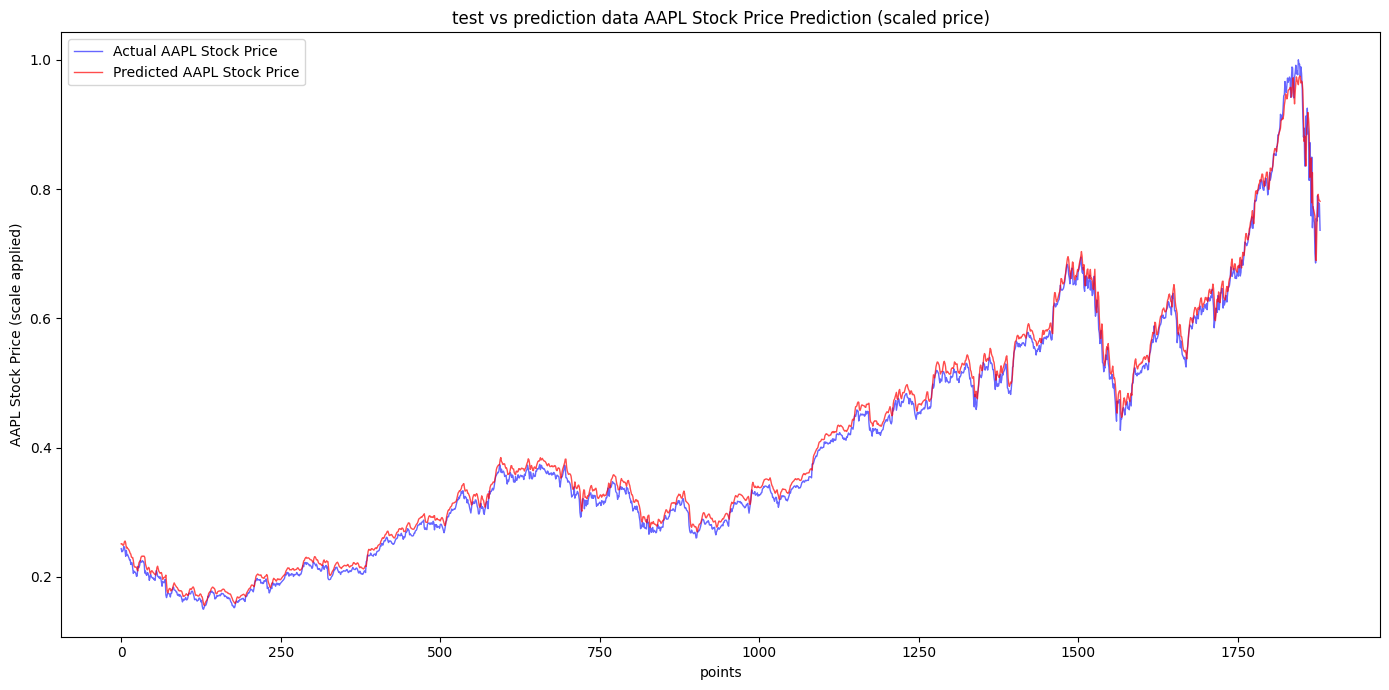

In [14]:

plt.figure(figsize=(14,7))
plt.plot(y_test, color ='blue',linewidth=1, alpha=0.6, label='Actual {0} Stock Price'.format(stock_name))
plt.plot(scaled_test_pred, color='red',linewidth=1, alpha=0.7, label='Predicted {0} Stock Price'.format(stock_name))
plt.title("test vs prediction data {0} Stock Price Prediction (scaled price)".format(stock_name))
plt.xlabel('points' )
plt. ylabel('{0} Stock Price (scale applied)'.format(stock_name))
plt.legend()
plt.tight_layout()

plt.show()


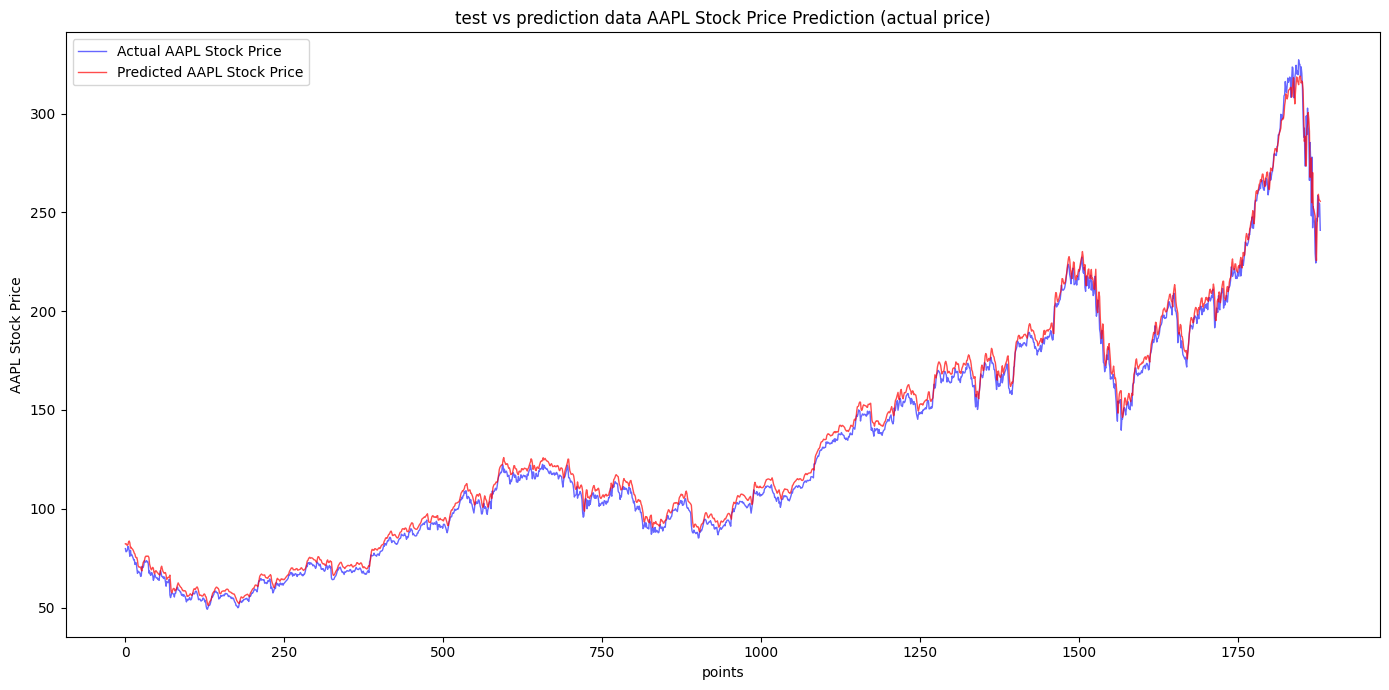

In [15]:

y_test = np.reshape(y_test, (y_test.shape[0], 1))
inv_y_test=scaler.inverse_transform(y_test)
inv_test_pred=scaler.inverse_transform(scaled_test_pred)

plt.figure(figsize=(14,7))
plt.plot(inv_y_test, color ='blue',linewidth=1, alpha=0.6, label='Actual {0} Stock Price'.format(stock_name))
plt.plot(inv_test_pred, color='red',linewidth=1, alpha=0.7, label='Predicted {0} Stock Price'.format(stock_name))
plt.title('test vs prediction data {0} Stock Price Prediction (actual price)'.format(stock_name))
plt.xlabel('points' )
plt.ylabel('{0} Stock Price'.format(stock_name))
plt.legend()
plt.tight_layout()

plt.show()

1880
1980


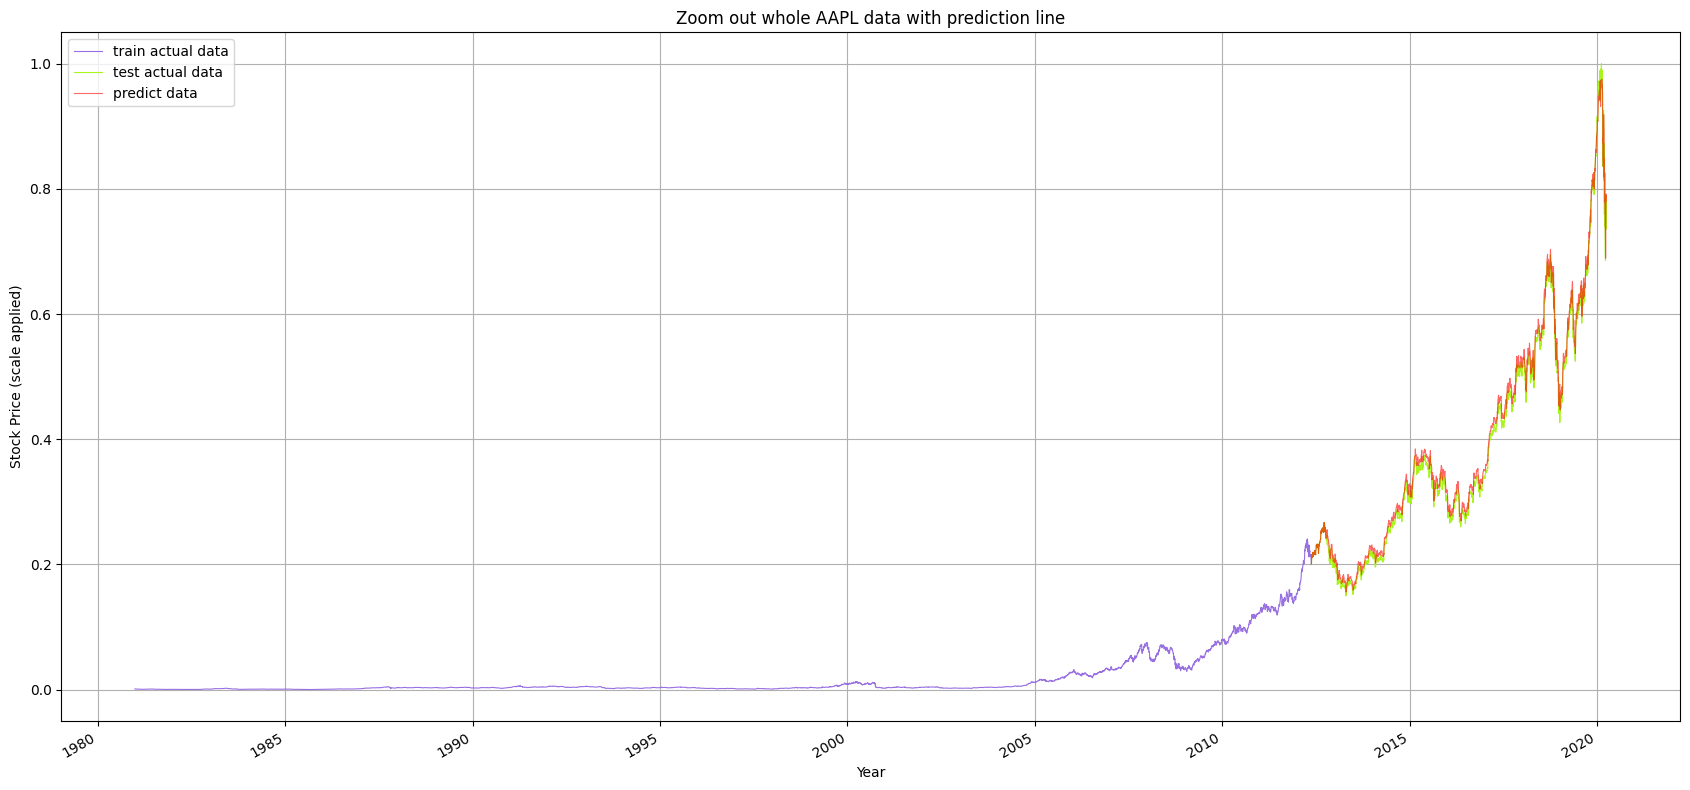

In [16]:
# get the first 100 values since back step is 100.
# we ignored first 100 points as algo needs to look back 100 step to predict 101th value.
# add these to the test prediction
alist = X_test[0].tolist()
#print(alist)
blist = scaled_test_pred[:].tolist()
print(len(blist))
#print(blist)
clist = alist + blist
print(len(clist))
aligned_test_pred = np.array(clist).astype(np.float32)
#display(aligned_test_pred)

# get the prediction data
tmp = pd.DataFrame(aligned_test_pred, columns=['Predictions'],index=test.index)
#display(tmp.head(10))

# get the prediction data
#tmp = pd.DataFrame()
#tmp['Adj Close'] = test['Adj Close']
#tmp['Predictions'] = test_pred_results['Predictions']
#tmp = tmp.drop(columns=['Adj Close'], axis='columns')

fig, ax = plt.subplots(1, figsize=(17,8))
ax.plot(train['Adj Close'], linewidth=0.8, label='train actual data', alpha=0.96, color='#946AE1')
ax.plot(test['Adj Close'], linewidth=0.8, label='test actual data', alpha=0.96, color='#A5F411')
ax.plot(tmp['Predictions'], linewidth=0.8, label='predict data', alpha=0.6, color='red')

ax.set_title('Zoom out whole {0} data with prediction line'.format(stock_name))
ax.legend(loc='upper left')
ax.set_xlabel('Year')
ax.set_ylabel('Stock Price (scale applied)')
#ax.set_yscale('log')

#plt.xticks(rotation=90)
fig.autofmt_xdate()
ax.grid(True)
plt.tight_layout()
plt.show()


In [17]:
#just for references
#0.20062895819287663, 0.21234537166549375, 0.21071110648186803
#0.24165527795475272
#0.24069584906101227
#0.7473837733268738, 0.7490988969802856, 0.7480850219726562

<br/>
<font style="color:#8B8000;font-size:20px"><b>----------------------------------------</b></font>
<br/>
<font style="color:green;font-size:20px">Prediction of N-days future stock price</font>
<br/>
<font style="color:#8B8000;font-size:20px"><b>----------------------------------------</b></font>
<br/>
<br/>

In [18]:

# Get the last 100 data from test to prepare input for LSTM
# to predict next N number of days future stock price
#
n_input = test[len(test)-back_step:]
n_input = np.array(n_input).reshape(1,-1)

storage_input = list(n_input)
storage_input = storage_input[0].tolist()

#display(n_input)
display(len(n_input))
display(n_input.shape)
display(back_step)
#display(storage_input)

#array([[0.31113444, 0.31683678, 0.30965605, 0.37143168, 0.36456765,...
#        0.37755642, 0.39234028, 0.39043953, 0.38970035, 0.37818999]])
#(1, 100)

1

(1, 100)

100

In [19]:
#
#
# Predict stock price for next N days based on specified back_step range(e.g. 100 previous data)
#
total_pred = []
i = 0
days_to_pred = 90  ### next N number of days to predict

while(i < days_to_pred):
    if(len(storage_input) > back_step):
        # chop off all oversized back-step storage
        # 1,2,3,...,99,100,101
        # 1 is discarded and keep 2 to 101 in storage to guess 102
        #
        n_input = np.array(storage_input[1:])
        #print("Day {} inputs {}".format(i+1,n_input) )
        n_input = n_input.reshape(1,-1)
        
        n_input = n_input.reshape((1, back_step, 1) )
        n_pred = model.predict(n_input, verbose=0)
        #print("Day {} output {}".format(i+1,n_pred) )
        storage_input.extend(n_pred[0].tolist() )
        storage_input = storage_input[1:]
        #print("storage len : {}".format(len(storage_input)) )
        total_pred.extend(n_pred.tolist() )
        i+=1
    else:
        n_input = n_input.reshape((1, back_step, 1) )
        n_pred = model.predict(n_input, verbose=0)
        #print("Day {} predicted {}".format(i+1, n_pred) )
        storage_input.extend(n_pred[0].tolist() )
        #print("storage len : {}".format(len(storage_input)) )
        total_pred.extend(n_pred.tolist() )
        i+=1

print(total_pred)


[[0.7470865845680237], [0.7411327362060547], [0.7422869801521301], [0.7478499412536621], [0.7565366625785828], [0.7672321200370789], [0.7789203524589539], [0.7906970381736755], [0.8005734086036682], [0.8096543550491333], [0.8179464936256409], [0.8256791234016418], [0.8327049612998962], [0.8388465642929077], [0.844585120677948], [0.8499845862388611], [0.8551130890846252], [0.8600004315376282], [0.8646435737609863], [0.869023859500885], [0.8731210231781006], [0.8769204616546631], [0.8804202079772949], [0.8836290836334229], [0.8865654468536377], [0.889251172542572], [0.8917088508605957], [0.8939589858055115], [0.8960195779800415], [0.8979054689407349], [0.899628758430481], [0.9012008309364319], [0.9026318192481995], [0.9039314985275269], [0.9051099419593811], [0.9061764478683472], [0.9071407914161682], [0.9080120325088501], [0.9087985157966614], [0.9095082879066467], [0.9101483821868896], [0.910725474357605], [0.9112452268600464], [0.9117128849029541], [0.9121336936950684], [0.91251188516

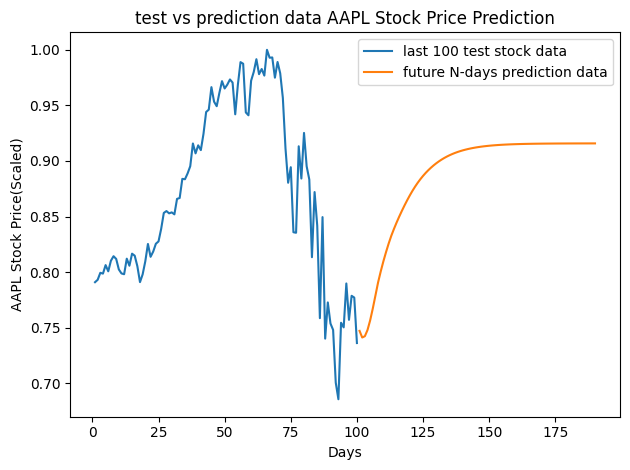

In [20]:

last_available_days = np.arange(1, back_step+1)
n_days_pred = np.arange(back_step+1, back_step+1+days_to_pred)

#plt.plot(last_available_days, scaler.inverse_transform(scaled_df_s[len(scaled_df_s)-back_step:]))
#plt.plot(n_days_pred, scaler.inverse_transform(total_pred))

plt.plot(last_available_days, scaled_df_s[len(scaled_df_s)-back_step:], label='last 100 test stock data')
plt.plot(n_days_pred, total_pred, label='future N-days prediction data')
plt.title('test vs prediction data {0} Stock Price Prediction'.format(stock_name))
plt.xlabel('Days' )
plt.ylabel('{0} Stock Price(Scaled)'.format(stock_name))
plt.legend()
plt.tight_layout()

plt.show()

<br/>
<font style="color:green;font-size:20px">In summary, I have picked one stock just for illustration. When we try to predict stock price for many unknown future data points, the curve seems to be smoother out as seen in the picture above. It is expected to have more features to make better prediction. Likewise, it is important to replace with last available actual data points in our history storage (back steps tracking) as sooner as they become available in real-world scenario. This will make prediction more accurate. </font>